In [1]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def get_data():
    return pd.read_csv('data/Inverter Data Set.csv')
data = get_data()
# print(type(data),'\n', 'Axes:', data.axes)

## Short Intro to the data-set
The data set comprises several sensor data collected from a typical combined system between an inverter, an induction motor, and a control system, deployed on a test bench. Test bench measurements were collected by the LEA department at Paderborn University.

An inverter is a power electronic component with transistors (read 'switches'), that determine how the battery voltage (so called DC-link voltage) is applied on the three phase circuits of the electric motor. The control unit decides according to some control strategy the current switching states of the inverter at each discrete point in time.

### First look on the data set

In [3]:
data.head(5)


,n_k,u_dc_k,u_dc_k-1,u_dc_k-2,u_dc_k-3,i_a_k,i_b_k,i_c_k,i_a_k-1,i_b_k-1,...,i_c_k-3,d_a_k-2,d_b_k-2,d_c_k-2,d_a_k-3,d_b_k-3,d_c_k-3,u_a_k-1,u_b_k-1,u_c_k-1
0,3001.406296,567.985297,567.689956,567.431534,567.948379,2.461991,-1.792057,-0.716639,2.729208,-2.098439,...,-0.613965,0.667181,0.874633,0.125367,0.706206,0.862754,0.137246,360.541201,510.640963,82.471117
1,3001.468250,567.911462,567.985297,567.689956,567.431534,2.292110,-1.556948,-0.757338,2.461991,-1.792057,...,-0.758263,0.642184,0.880046,0.119954,0.667181,0.874633,0.125367,346.410081,513.190083,79.729357
2,3001.527815,567.911462,567.911462,567.985297,567.689956,2.155288,-1.332946,-0.840587,2.292110,-1.556948,...,-0.698139,0.611911,0.884307,0.115693,0.642184,0.880046,0.119954,329.440240,515.804643,77.924637
3,3001.585080,567.653039,567.911462,567.911462,567.985297,2.048768,-1.135788,-0.925686,2.155288,-1.332946,...,-0.716639,0.578149,0.888915,0.111085,0.611911,0.884307,0.115693,311.058880,517.537603,75.478717
4,3001.640131,567.579204,567.653039,567.911462,567.911462,1.952350,-0.918266,-1.027434,2.048768,-1.135788,...,-0.757338,0.541979,0.892123,0.107877,0.578149,0.888915,0.111085,290.481760,519.138403,73.580077


In [4]:
data.describe()

,n_k,u_dc_k,u_dc_k-1,u_dc_k-2,u_dc_k-3,i_a_k,i_b_k,i_c_k,i_a_k-1,i_b_k-1,...,i_c_k-3,d_a_k-2,d_b_k-2,d_c_k-2,d_a_k-3,d_b_k-3,d_c_k-3,u_a_k-1,u_b_k-1,u_c_k-1
count,234527.000000,234527.000000,234527.000000,234527.000000,234527.000000,234527.000000,234527.000000,234527.000000,234527.000000,234527.000000,...,234527.000000,234527.000000,234527.000000,234527.000000,234527.000000,234527.000000,234527.000000,234527.000000,234527.000000,234527.000000
mean,1728.414990,567.136398,567.136565,567.136718,567.136882,0.000505,-0.007692,-0.008975,0.000518,-0.007737,...,-0.008874,0.500270,0.500259,0.500157,0.500273,0.500260,0.500156,283.412445,283.467753,283.745740
std,1084.463934,4.993615,4.993462,4.993317,4.993180,2.199349,2.155399,2.216263,2.199206,2.155302,...,2.216061,0.211920,0.211744,0.211753,0.211916,0.211742,0.211751,114.648325,114.290928,114.606340
min,404.433935,548.012908,548.012908,548.012908,548.012908,-7.300153,-6.320221,-7.112914,-7.300153,-6.320221,...,-7.112914,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.288485,-2.087925,-2.312405
25%,507.572918,566.730100,566.730100,566.730100,566.730100,-1.573353,-1.576386,-1.591675,-1.572894,-1.576386,...,-1.591675,0.390344,0.390623,0.390473,0.390354,0.390629,0.390468,231.879423,232.372159,232.330279
50%,1501.516456,568.649812,568.649812,568.649812,568.649812,0.023062,0.000881,0.010400,0.023062,0.000881,...,0.011325,0.500735,0.499997,0.499667,0.500745,0.499975,0.499680,284.749840,284.334880,284.442640
75%,2996.851500,570.126514,570.126514,570.126514,570.126514,1.552902,1.557785,1.566225,1.552902,1.557785,...,1.566225,0.610013,0.609538,0.609828,0.610026,0.609540,0.609827,337.448361,337.198841,338.029761
max,3231.756077,575.553392,575.553392,575.553392,575.553392,7.470243,6.668168,7.437108,7.470243,6.668168,...,7.437108,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,573.338724,573.202404,573.172324


<AxesSubplot:>

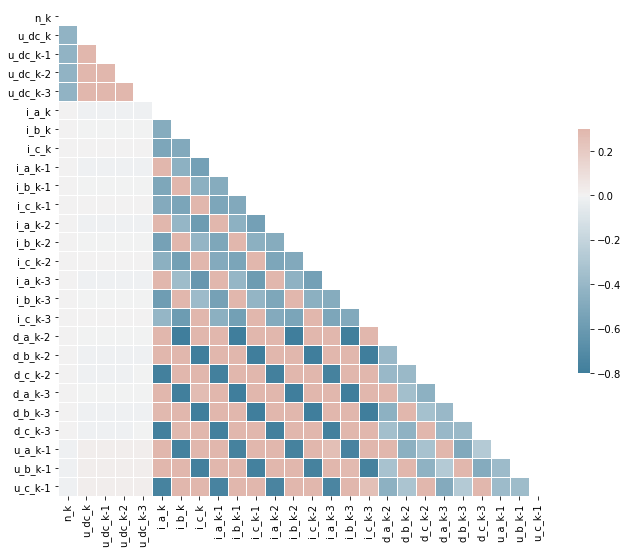

In [5]:

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

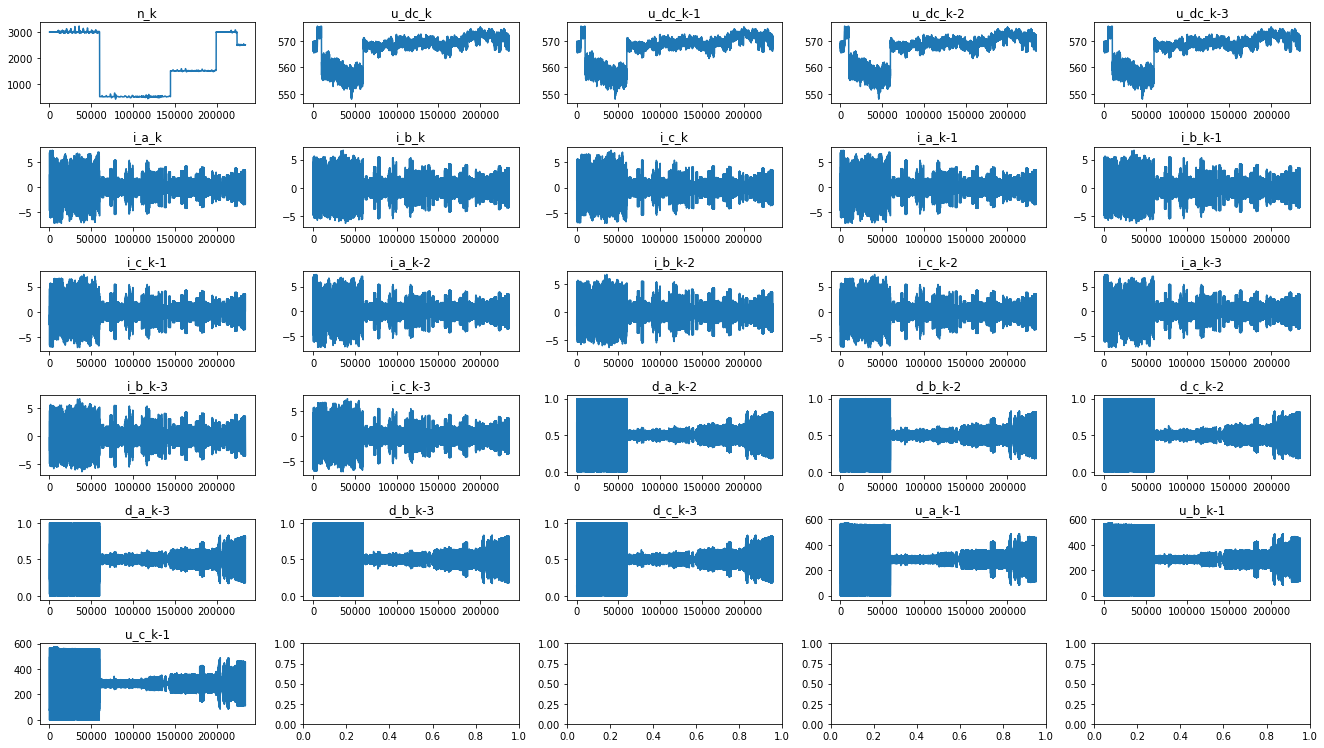

In [6]:
x = []
for i in range(0, len(data)):
    x.append(i) 

rows = math.ceil(len(data.columns) / 5)
fig, ax = plt.subplots(rows, 5)
ax = ax.ravel()

j = 0
for column in data:
    ax[j].plot(x, data[column])
    ax[j].set_title(column)
    j += 1
    
fig.set_size_inches(18.5, 10.5)
plt.tight_layout()

Detailed analysis of enginespeed

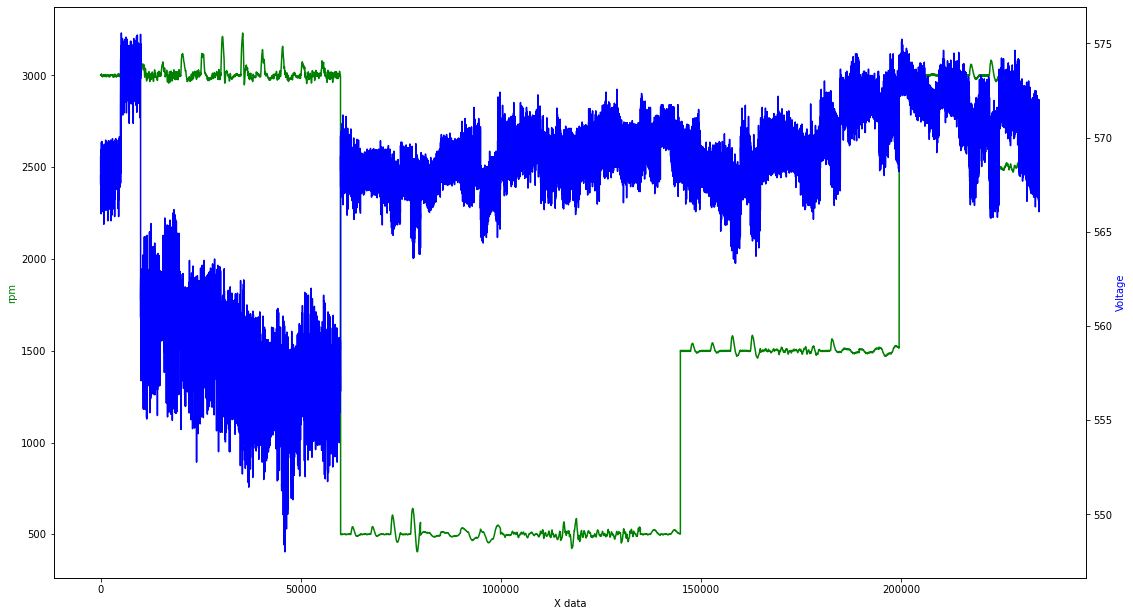

In [7]:

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, data['n_k'], 'g-')
ax2.plot(x, data['u_dc_k'], 'b-')

ax1.set_xlabel('X data')
ax1.set_ylabel('rpm', color='g')
ax2.set_ylabel('Voltage', color='b')
fig.set_size_inches(18.5, 10.5)

plt.show()


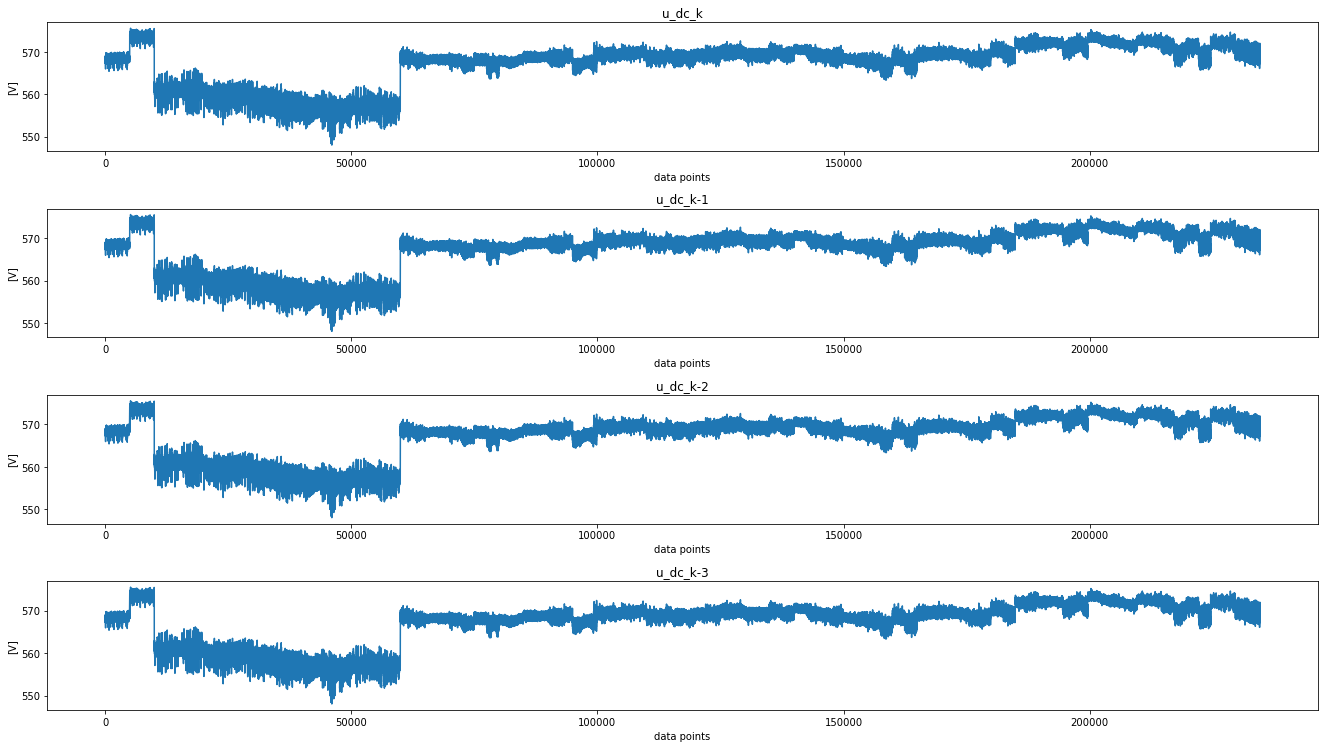

In [8]:
fig, ax = plt.subplots(4, 1)

lst = ['u_dc_k', 'u_dc_k-1', 'u_dc_k-2', 'u_dc_k-3']

i = 0
for item in lst:
    ax[i].plot(x, data[item])
    ax[i].set_xlabel('data points')
    ax[i].set_ylabel('[V]')
    ax[i].set_title(item)
    i += 1

fig.set_size_inches(18.5, 10.5)
plt.tight_layout()

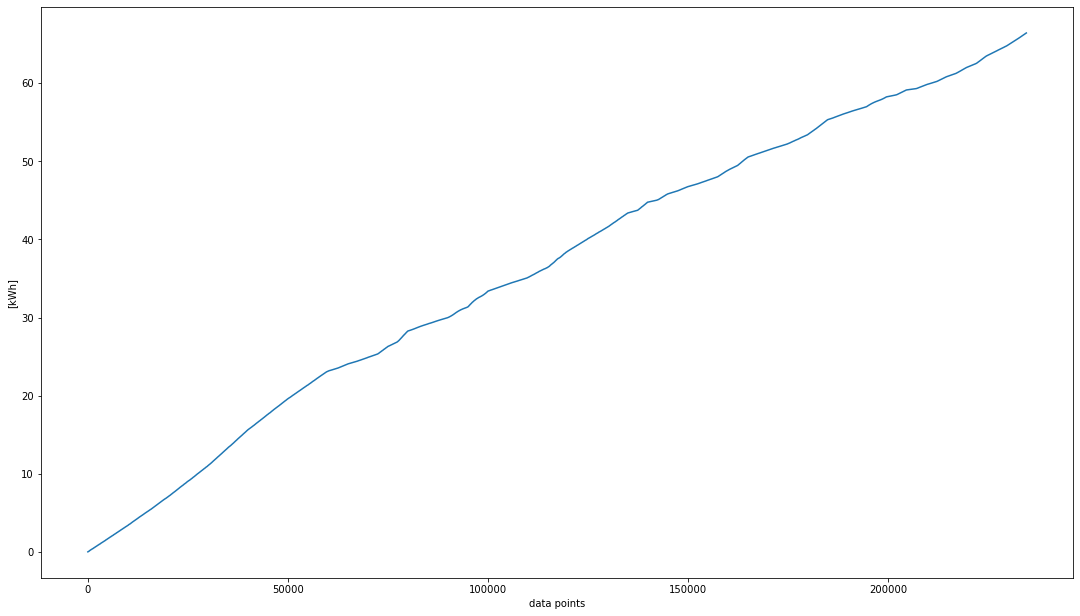

In [41]:
effect = data['u_dc_k'] * data['i_a_k'] 

# Integrate signal
lst = []
temp = 0

for i in range(0, len(effect)):
    temp += np.abs(effect[i]*(1/3600)*(1/1000))
    lst.append(temp)

fig, ax = plt.subplots(1, 1)
ax.plot(x, lst)
ax.set_xlabel('data points')
ax.set_ylabel('[kWh]')
fig.set_size_inches(18.5, 10.5)
